<a href="https://colab.research.google.com/github/abhranil-datascience/ReinforcementLearning/blob/master/ThompsonSamplingPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Found the most popular ad: 4 at round 817
Total Reward: 2627


(array([  91.,   63.,   43.,   59., 9408.,   17.,   52.,  192.,   55.,
          20.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

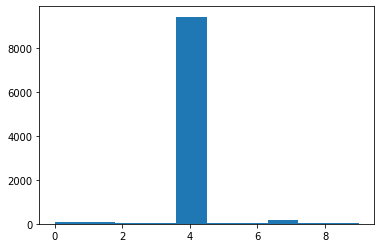

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/ML/ReinforcementLearning/ThompsonSampling')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')
########## Import Dataset #################
import pandas as pd
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')
Adlist=dataset.iloc[:,:].values
######### Thompson Sampling ###############
import random
num_of_selections=[0]*Adlist.shape[1]
num_of_rejections=[0]*Adlist.shape[1]
ad_selected=[]
total_rewards=0
for rounds in range(0,Adlist.shape[0]):
  max_beta=0
  ad=0
  for current_ad_index in range(0,Adlist.shape[1]):
    beta=random.betavariate(num_of_selections[current_ad_index]+1,num_of_rejections[current_ad_index]+1)
    if beta>max_beta:
      max_beta=beta
      ad=current_ad_index
  Reward=Adlist[rounds][ad]
  ad_selected.append(ad)
  if Reward>0:
    num_of_selections[ad]=num_of_selections[ad]+1
    total_rewards=total_rewards+Reward
  else:
    num_of_rejections[ad]=num_of_rejections[ad]+1
  ####### Check when to break #############
  num_of_selections_temp=[]
  for val in num_of_selections:
    num_of_selections_temp.append(val)
  num_of_selections_temp.sort()
  most_popular_ad=num_of_selections.index(num_of_selections_temp[-1])
  second_most_popular_ad=num_of_selections.index(num_of_selections_temp[-2])
  if num_of_selections[most_popular_ad]-num_of_selections[second_most_popular_ad]==15:
    print("Found the most popular ad: "+str(most_popular_ad)+ " at round "+str(rounds) )
    break
########## Select highest voted ad for rest of the rounds ################
for rows in range(rounds+1,Adlist.shape[0]):
  ad_selected.append(most_popular_ad)
  total_rewards=total_rewards+Adlist[rows][most_popular_ad]
print("Total Reward: "+str(total_rewards))
########## Create Ad-Histogram ###############
import matplotlib.pyplot as plt
plt.hist(x=ad_selected)